## 5. Задание

Загрузим исходные данные.

In [1]:
import os
import re

In [2]:
with open(os.path.join(".", "ionosphere.arff")) as file:
    text = file.read()

In [3]:
data = re.findall("@data(.*?)%", text, re.DOTALL)

In [4]:
data = map(str.strip, data[0].splitlines())
data = filter(lambda x: x != "", data)
data = tuple(data)

In [5]:
len(data)

351

Проверим, что количество примеров совпадает с количество, которое указано в файле.

In [6]:
num_inst = re.search("Number of Instances.*\s", text)

In [7]:
num_inst.group().strip()
del text

Найденное количество совпадает с тем, которое хранится в файле.

In [8]:
from io import StringIO

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [9]:
dataset = pd.read_csv(StringIO("\n".join(data)), header=None)
del data

Посмотрим на набор данных.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
0     351 non-null int64
1     351 non-null int64
2     351 non-null float64
3     351 non-null float64
4     351 non-null float64
5     351 non-null float64
6     351 non-null float64
7     351 non-null float64
8     351 non-null float64
9     351 non-null float64
10    351 non-null float64
11    351 non-null float64
12    351 non-null float64
13    351 non-null float64
14    351 non-null float64
15    351 non-null float64
16    351 non-null float64
17    351 non-null float64
18    351 non-null float64
19    351 non-null float64
20    351 non-null float64
21    351 non-null float64
22    351 non-null float64
23    351 non-null float64
24    351 non-null float64
25    351 non-null float64
26    351 non-null float64
27    351 non-null float64
28    351 non-null float64
29    351 non-null float64
30    351 non-null float64
31    351 non-null float64
32    351 non-null float64
33    35

In [11]:
dataset.rename(columns={34: "class"}, inplace=True)
dataset["num_class"] = dataset["class"].map({"g": 1, "b": 0})

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 36 columns):
0            351 non-null int64
1            351 non-null int64
2            351 non-null float64
3            351 non-null float64
4            351 non-null float64
5            351 non-null float64
6            351 non-null float64
7            351 non-null float64
8            351 non-null float64
9            351 non-null float64
10           351 non-null float64
11           351 non-null float64
12           351 non-null float64
13           351 non-null float64
14           351 non-null float64
15           351 non-null float64
16           351 non-null float64
17           351 non-null float64
18           351 non-null float64
19           351 non-null float64
20           351 non-null float64
21           351 non-null float64
22           351 non-null float64
23           351 non-null float64
24           351 non-null float64
25           351 non-null float64
26           35

In [13]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,num_class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Посмотрим на пропуски в данных.

In [14]:
pd.isna(dataset).any(axis="columns").any()

False

Пропусков нет. Посмотрим распредление по классам

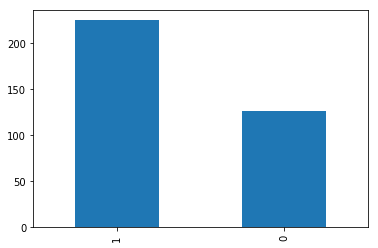

In [15]:
dataset["num_class"].value_counts().plot.bar()

 Видно, что калассы несбалансированы. Примеров класса 0 меньше, чем 1.

В наборе данных содержатся целочисленные значения в столбцах 0,1. Посмотрим на уникальные значения.

In [16]:
dataset[[0,1]].apply(lambda x: np.array2string(x, separator="")
                     , axis="columns", raw=True).unique()

array(['[10]', '[00]'], dtype=object)

Видно, что присутсвуют всего две уникальные комбинации. Значение во втором столбце всегд равны 0.

In [17]:
dataset[1].unique()

array([0], dtype=int64)

Признак во втором столбце имеет всегда нулевое значение, поэтому для классификации не представляет интереса.

In [18]:
dataset.drop(columns=1, inplace=True)

Рассмотрим комбинацию первого признака с номерами классов.

In [19]:
dataset[[0, "num_class"]].apply(lambda x: np.array2string(x, separator="")
                     , axis="columns", raw=True).value_counts()

[11]    225
[10]     88
[00]     38
dtype: int64

По результаттам анализа у нас есть 1 категориальный признак, а остальные числовые. Воспользуемся scikit-learn для построения классификатора.
Из-за того что примеров немного строить сложные модели не имеет смысла, поэтому попробуем простые модели.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [21]:
x_train = dataset[dataset.columns.difference(["num_class", "class"])]
y_train = dataset["num_class"]

Протестировав разные модели было принято решение остановится на методе опорных векторов с радиально-базисными функциями в качестве ядра. В качестве параметры алгоритмы был выбран коэффициент $C$. Так как примеров мало, то кросс-валидация использовалась с двумя блоками. Основной метрикой была выбрана доля правильных ответов (accurcay), а также точность (precision) в качестве дополнительной метрики. Так как больше всего интересует классификация объектов класса 1.

In [22]:
parameters = {"kernel": ("rbf", ), "C": np.linspace(10, 12, 50)}
svc = SVC(class_weight="balanced")
clf = GridSearchCV(svc, parameters, cv=2,
                   scoring=["accuracy", "precision"]
                   , refit="accuracy")
clf.fit(x_train, y_train)

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureW

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('rbf',), 'C': array([10.     , 10.04082, 10.08163, 10.12245, 10.16327, 10.20408,
       10.2449 , 10.28571, 10.32653, 10.36735, 10.40816, 10.44898,
       10.4898 , 10.53061, 10.57143, 10.61224, 10.65306, 10.69388,
       10.73469, 10.77551, 10.81633, 10.85714, 10.89796, 10.93...347,
       11.71429, 11.7551 , 11.79592, 11.83673, 11.87755, 11.91837,
       11.95918, 12.     ])},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['accuracy', 'precision'],
       verbose=0)

Показаны средние значения выбранных метрик на тестовом множестве в качестве основных параметров по которым следует выбирать параметры.

In [23]:
res = pd.DataFrame(clf.cv_results_)[["params", "mean_test_accuracy", "mean_test_precision", "rank_test_accuracy", "rank_test_precision"]]
res.sort_values("rank_test_accuracy", inplace=True)
res

c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\program files\python37\lib\site-packages\s

,params,mean_test_accuracy,mean_test_precision,rank_test_accuracy,rank_test_precision
49,"{'C': 12.0, 'kernel': 'rbf'}",0.934473,0.931575,1,1
43,"{'C': 11.755102040816327, 'kernel': 'rbf'}",0.934473,0.931575,1,1
44,"{'C': 11.795918367346939, 'kernel': 'rbf'}",0.934473,0.931575,1,1
48,"{'C': 11.959183673469388, 'kernel': 'rbf'}",0.934473,0.931575,1,1
46,"{'C': 11.877551020408163, 'kernel': 'rbf'}",0.934473,0.931575,1,1
47,"{'C': 11.918367346938776, 'kernel': 'rbf'}",0.934473,0.931575,1,1
45,"{'C': 11.83673469387755, 'kernel': 'rbf'}",0.934473,0.931575,1,1
26,"{'C': 11.061224489795919, 'kernel': 'rbf'}",0.931624,0.927689,8,8
27,"{'C': 11.10204081632653, 'kernel': 'rbf'}",0.931624,0.927689,8,8
28,"{'C': 11.142857142857142, 'kernel': 'rbf'}",0.931624,0.927689,8,8


Построим классификатор с выбранными параметрами.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_train
                                                    , y_train
                                                    , test_size=0.25
                                                    , random_state=42
                                                    , stratify=y_train)

best_par  = clf.best_params_ 

cls = SVC(**best_par)
cls.fit(x_train_val, y_train_val)

predicted = cls.predict(x_test)

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Построим матрицу ошибок (confusion matrix) для понимания качества работы классификатора.

In [28]:
confusion_matrix(y_test, predicted)

array([[28,  4],
       [ 0, 56]], dtype=int64)

По результатам видно, что есть оибки в классификации, но по крайней мере классифкатор предсказывает значения и для класса 0 тоже. Было опасение, что он мог переобучиться и предсказывать только класс 1.

## Анализ статьи

[VINCENT G. SIGILLITO, SIMON P. WING, LARRIE V. HUTTON, and KILE B. BAKER
CLASSIFICATION OF RADAR RETURNS FROM THE
IONOSPHERE USING NEURAL NETWORKS](https://docviewer.yandex.ru/view/130440642/?*=3tZ5pF%2BJcWahbknb3rqjcAiwon97InVybCI6Imh0dHBzOi8vd3d3LmpodWFwbC5lZHUvVGVjaERpZ2VzdC92aWV3cy9wZGZzL1YxMF9OM18xOTg5L1YxMF9OM18xOTg5X1NpZ2lsbGl0b19DbGFzcy5wZGYiLCJ0aXRsZSI6IlYxMF9OM18xOTg5X1NpZ2lsbGl0b19DbGFzcy5wZGYiLCJ1aWQiOiIxMzA0NDA2NDIiLCJ5dSI6IjEzNTkxNzcwMjE1MjAzNTAxNjkiLCJub2lmcmFtZSI6dHJ1ZSwidHMiOjE1NDkzODYxMzM1OTMsInNlcnBQYXJhbXMiOiJsYW5nPWVuJm5hbWU9VjEwX04zXzE5ODlfU2lnaWxsaXRvX0NsYXNzLnBkZiZ0bT0xNTQzNDIxMzc3JnRsZD1ydSZ0ZXh0PVNpZ2lsbGl0byUyQyUyMFYuJTIwRy4lMkMlMjBXaW5nJTJDJTIwUy4lMjBQLiUyQyUyMEh1dHRvbiUyQyUyMEwuJTIwVi4lMkMlMjAlNUMlMjYlMjBCYWtlciUyQyUyMEsuJTIwQi4lMjAlMjgxOTg5JTI5LiUyMENsYXNzaWZpY2F0aW9uJTIwb2YlMjByYWRhciUyMHJldHVybnMlMjBmcm9tJTIwdGhlJTIwaW9ub3NwaGVyZSUyMHVzaW5nJTIwbmV1cmFsJTIwbmV0d29ya3MuJTIwSm9obnMlMjBIb3BraW5zJTIwQVBMJTIwVGVjaG5pY2FsJTIwRGlnZXN0JTJDJTIwMTAlMkMlMjAyNjItMjY2LiZ1cmw9aHR0cHMlM0ElMkYlMkZ3d3cuamh1YXBsLmVkdSUyRlRlY2hEaWdlc3QlMkZ2aWV3cyUyRnBkZnMlMkZWMTBfTjNfMTk4OSUyRlYxMF9OM18xOTg5X1NpZ2lsbGl0b19DbGFzcy5wZGYmbHI9MjEzJm1pbWU9cGRmJmwxMG49cnUmc2lnbj1mNDFkYTliNzI5NjgyMjBlYjc1M2JkZjJjMTJiMmUwZCZrZXlubz0wIn0%3D&page=1&lang=en)


Авторы предложили использовать нейронные сети для автоматической классификации сигнала радара, который отражается от ионосферы, на два типа: "хороший", "плохой".

В качестве параметров использовались 17 пар комплексных чисел, которые описывали комплексную автокорреляционную функцию отражённого сигнала. Всего получилось 34 признака, что отражено в наборе данных (действительная и мнимая часть на каждое комплексное число). Эти параметры подававлись на вход нейронным сетям различной конфигурации. Для обучения сети использовался метод обратного распространения ошибки со среднеквадратической функцией потерь.

Рассматривались нейронные сети прямого распространения: нейронная сеть с одным скрытым слоем и нейронная есть без скрытого слоя (персептрон). Персептрон использовался для получения базового уровня показателя качества в задаче классификации. Сеть со скрытым слоем использовалась для демонстрации преимущества сетей со скрытыми слоями над сетями без скрытых слоёв в их обобщающей способности и возможностей восстановлений сложных зависимостей.

В заключении авторы приводят результаты того, что одна из сетей со скрытым слоем определённой конфигурации достигла уровня чувствительности (sensitivity) в 100%. Специфисность составила (specificity) 63%. Один из основных выводов состоит в том, что нейронные сети вполне успешно могут использоваться в задачах автоматизации.